#### Import libraries and files

In [1]:
import pandas as pd
import json
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

idx = pd.IndexSlice
data_fol = r"..\data_files"

In [2]:
from sklearn.model_selection import train_test_split
from scipy.stats import iqr

In [3]:
df_eng = pd.read_pickle(os.path.join(data_fol, "dataset_no_outliers_engagement.pkl"))
text_df = pd.read_pickle(os.path.join(data_fol, "dataset_text_only_no_outliers.pkl"))

#### first, clean up and categorize the engagement information

In [4]:
df_eng.head()

,,quote_count,reply_count,retweet_count,favorite_count,user_followers_count,user_verified,text,media_count,media_types,active_engagement,passive_engagement
tid,uid,,,,,,,,,,,
1333476068192366593,2152363202,0,2,3,16,6070,False,"Teen pregnancy is high, HIV infection rate is ...",0,none,2,19
1364161232270487553,1331332400836726785,0,0,0,0,62,False,Even though it was a charity. Stevens thought...,0,none,0,0
1364161201291153414,150301804,0,0,0,0,1044,False,SCORA\nStanding Committee on Sexual &amp; Repr...,0,none,0,0
1364161184505737217,1317091162159747075,0,0,0,0,15,False,"many females are HIV+, we wish you well, bless...",0,none,0,0
1363439109948149760,1353391442408792066,0,0,2,24,184,False,@TheRustler83 Yep. Imagine if the government w...,0,none,0,26


Don't need any of these columns that just repeat information

In [5]:
engagement = df_eng.reset_index().drop(columns=['quote_count', 'reply_count', 'retweet_count', 'favorite_count', 'uid', 'text'])
engagement.head()

,tid,user_followers_count,user_verified,media_count,media_types,active_engagement,passive_engagement
0,1333476068192366593,6070,False,0,none,2,19
1,1364161232270487553,62,False,0,none,0,0
2,1364161201291153414,1044,False,0,none,0,0
3,1364161184505737217,15,False,0,none,0,0
4,1363439109948149760,184,False,0,none,0,26


In [6]:
engagement['all_engagement'] = engagement['active_engagement']*.25 + engagement['passive_engagement']*.75

In [7]:
engagement['user_verified'] = engagement['user_verified'].astype(int)

In [8]:
engagement['media_types'] = engagement['media_types'].replace("none", np.nan)

create dummy variables for the media counts

In [9]:
dummies_df = pd.get_dummies(engagement['media_types'], prefix='media')
dummies_df

,media_animated_gif,media_photo,media_video
0,0,0,0
1,0,0,0
2,0,0,0
3,0,0,0
4,0,0,0
...,...,...,...
17919,0,0,0
17920,0,0,0
17921,0,0,0
17922,0,0,0


In [10]:
engagement = pd.concat([engagement, dummies_df], axis=1)
engagement.head()

,tid,user_followers_count,user_verified,media_count,media_types,active_engagement,passive_engagement,all_engagement,media_animated_gif,media_photo,media_video
0,1333476068192366593,6070,0,0,<NA>,2,19,14.75,0,0,0
1,1364161232270487553,62,0,0,<NA>,0,0,0.00,0,0,0
2,1364161201291153414,1044,0,0,<NA>,0,0,0.00,0,0,0
3,1364161184505737217,15,0,0,<NA>,0,0,0.00,0,0,0
4,1363439109948149760,184,0,0,<NA>,0,26,19.50,0,0,0


drop more replicated data columns

In [11]:
engagement.drop(columns=['media_types', 'active_engagement', 'passive_engagement'], inplace=True)

In [12]:
engagement.set_index('tid', inplace=True)

In [13]:
engagement.head()

,user_followers_count,user_verified,media_count,all_engagement,media_animated_gif,media_photo,media_video
tid,,,,,,,
1333476068192366593,6070,0,0,14.75,0,0,0
1364161232270487553,62,0,0,0.00,0,0,0
1364161201291153414,1044,0,0,0.00,0,0,0
1364161184505737217,15,0,0,0.00,0,0,0
1363439109948149760,184,0,0,19.50,0,0,0


In [14]:
engagement.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17924 entries, 1333476068192366593 to 1343490641230233601
Data columns (total 7 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   user_followers_count  17924 non-null  Int64  
 1   user_verified         17924 non-null  int32  
 2   media_count           17924 non-null  Int64  
 3   all_engagement        17924 non-null  float64
 4   media_animated_gif    17924 non-null  uint8  
 5   media_photo           17924 non-null  uint8  
 6   media_video           17924 non-null  uint8  
dtypes: Int64(2), float64(1), int32(1), uint8(3)
memory usage: 717.7 KB


In [15]:
engagement.describe()

,user_followers_count,user_verified,media_count,all_engagement,media_animated_gif,media_photo,media_video
count,1.792400e+04,17924.000000,17924.000000,17924.000000,17924.000000,17924.000000,17924.000000
mean,1.683921e+04,0.059864,0.031522,8.245746,0.002008,0.023042,0.002957
std,2.054266e+05,0.237241,0.204724,29.160635,0.044772,0.150040,0.054299
min,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.390000e+02,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,7.160000e+02,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
75%,2.934250e+03,0.000000,0.000000,4.250000,0.000000,0.000000,0.000000
max,1.804246e+07,1.000000,4.000000,463.250000,1.000000,1.000000,1.000000


Explore the engagement and determine where category boundries should go. Here I use simple quartiles as the boundaries.

In [18]:
log_engagement = engagement['all_engagement'].apply(lambda x: np.log(x+1))

C:\Users\smana\anaconda3\envs\nlp\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


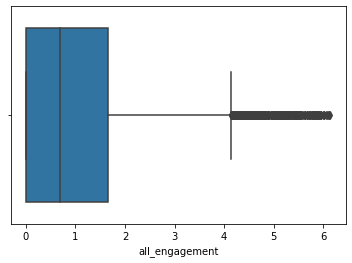

In [27]:
sns.boxplot(log_engagement)
plt.show()

In [51]:
#identify value of 4th quartile
q4 = iqr(log_engagement)*1.5 + np.percentile(log_engagement, 75)

#everything considered an outlier in this set will be considered high engagement
high_engagement = np.e ** q4 - 1
high_engagement

62.153621296110174

In [52]:
#identify value of 3rd quartile
q3 = np.percentile(log_engagement, 75)

#everything between q3 and q4 will be considered medium engagement
med_engagement = np.e ** q3 - 1
med_engagement

4.25

In [53]:
def map_eng_categories(x, med=med_engagement, high=high_engagement):
    if x < 1:
        return "zero"
    elif 1 <= x < med:
        return "low"
    elif med <= x <= high:
        return "med"
    else:
        return "high"

In [54]:
engagement['categories'] = engagement['all_engagement'].apply(lambda x: map_eng_categories(x))

The engagement and other numerical data is complete. Now to add it to the text data

In [55]:
engagement.head()

,user_followers_count,user_verified,media_count,all_engagement,media_animated_gif,media_photo,media_video,categories
tid,,,,,,,,
1333476068192366593,6070,0,0,14.75,0,0,0,med
1364161232270487553,62,0,0,0.00,0,0,0,zero
1364161201291153414,1044,0,0,0.00,0,0,0,zero
1364161184505737217,15,0,0,0.00,0,0,0,zero
1363439109948149760,184,0,0,19.50,0,0,0,med


#### Grabbing import text data to merge it to make a final full dataframe

In [70]:
text_df

,tid,text,clean,hashtags,hashtags_count,mentions,clean_no_@#
0,1333476068192366593,"Teen pregnancy is high, HIV infection rate is ...","[teen, pregnancy, high, hiv, infection, rate, ...",[],0,[],teen pregnancy high hiv infection rate growing...
1,1364161232270487553,Even though it was a charity. Stevens thought...,"[even, though, charity, stevens, thought, spea...","[hiv, haemophilia]",2,[bloodinquiry],even though charity stevens thought speaking d...
2,1364161201291153414,SCORA\nStanding Committee on Sexual &amp; Repr...,"[scora, standing, committee, sexual, reproduct...",[],0,[],scora standing committee sexual reproductive h...
3,1364161184505737217,"many females are HIV+, we wish you well, bless...","[many, female, hiv, wish, well, blessing, cant...",[],0,[],many female hiv wish well blessing cant heal t...
4,1363439109948149760,@TheRustler83 Yep. Imagine if the government w...,"[therustler83, yep, imagine, government, deman...",[],0,[therustler83],yep imagine government demanding hiv test week...
...,...,...,...,...,...,...,...
17919,1344036814668103680,"Use condoms, HIV is real.\n\nUse condoms, unwa...","[use, condom, hiv, real, use, condom, unwanted...",[],0,[],use condom hiv real use condom unwanted pregna...
17920,1344036806153670662,So you can knowingly give someone AIDS/HIV wit...,"[knowingly, give, someone, aidshiv, without, p...",[],0,[],knowingly give someone aidshiv without penalty...
17921,1344034811124588546,'Stigma' is 100% meaningless in this context.\...,"[stigma, 100, meaningless, context, demonstrat...",[],0,[],stigma 100 meaningless context demonstrates pr...
17922,1344036727321735174,Look what the upcoming administration has plan...,"[look, upcoming, administration, planned, woul...",[],0,[],look upcoming administration planned would mak...


In [89]:
def delistinator(x):
    words = ' '.join([word for word in x])
    return words

In [78]:
text_df['hashtags_clean'] = text_df['hashtags'].apply(lambda x: delistinator(x))

In [83]:
text_df[['clean_no_@#', 'hashtags_clean']]

,clean_no_@#,hashtags_clean
0,teen pregnancy high hiv infection rate growing...,
1,even though charity stevens thought speaking d...,hiv haemophilia
2,scora standing committee sexual reproductive h...,
3,many female hiv wish well blessing cant heal t...,
4,yep imagine government demanding hiv test week...,
...,...,...
17919,use condom hiv real use condom unwanted pregna...,
17920,knowingly give someone aidshiv without penalty...,
17921,stigma 100 meaningless context demonstrates pr...,
17922,look upcoming administration planned would mak...,


just one more step of text cleaning that I should have done before.

In [84]:
import re

In [100]:
def number_deleter(x):
    nums = re.findall(r"[0-9]", x)
    new_text = ''.join([w for w in x if w not in nums])
    return new_text

In [103]:
text_df['text_clean'] = text_df['clean_no_@#'].apply(lambda x: number_deleter(x))

In [106]:
text_df[['tid', 'hashtags_clean', 'text_clean']].set_index('tid')

,hashtags_clean,text_clean
tid,,
1333476068192366593,,teen pregnancy high hiv infection rate growing...
1364161232270487553,hiv haemophilia,even though charity stevens thought speaking d...
1364161201291153414,,scora standing committee sexual reproductive h...
1364161184505737217,,many female hiv wish well blessing cant heal t...
1363439109948149760,,yep imagine government demanding hiv test week...
...,...,...
1344036814668103680,,use condom hiv real use condom unwanted pregna...
1344036806153670662,,knowingly give someone aidshiv without penalty...
1344034811124588546,,stigma meaningless context demonstrates progr...


In [108]:
full_df = pd.concat([engagement, text_df[['tid', 'hashtags_clean', 'text_clean']].set_index('tid')], axis=1)
full_df

,user_followers_count,user_verified,media_count,all_engagement,media_animated_gif,media_photo,media_video,categories,hashtags_clean,text_clean
tid,,,,,,,,,,
1333476068192366593,6070,0,0,14.75,0,0,0,med,,teen pregnancy high hiv infection rate growing...
1364161232270487553,62,0,0,0.00,0,0,0,zero,hiv haemophilia,even though charity stevens thought speaking d...
1364161201291153414,1044,0,0,0.00,0,0,0,zero,,scora standing committee sexual reproductive h...
1364161184505737217,15,0,0,0.00,0,0,0,zero,,many female hiv wish well blessing cant heal t...
1363439109948149760,184,0,0,19.50,0,0,0,med,,yep imagine government demanding hiv test week...
...,...,...,...,...,...,...,...,...,...,...
1344036814668103680,43224,0,0,22.00,0,0,0,med,,use condom hiv real use condom unwanted pregna...
1344036806153670662,307,0,0,0.75,0,0,0,zero,,knowingly give someone aidshiv without penalty...
1344034811124588546,48668,1,0,15.75,0,0,0,med,,stigma meaningless context demonstrates progr...


In [64]:
def get_train_test_split(dataframe, y_col, test_size=.33):
    X = dataframe.drop(columns=y_col)
    y = dataframe[y_col]
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=42)
    
    return X_train, X_test, y_train, y_test

In [65]:
def save_train_test_data(save_loc, prefix, dataframe, y_col, test_size=.33):
    X_train, X_test, y_train, y_test = get_train_test_split(dataframe, y_col, test_size)
    if os.path.exists(save_loc)==False:
        os.mkdir(save_loc)
    
    pd.to_pickle(X_train, os.path.join(save_loc, "{}_X_train.pkl".format(prefix)))
    pd.to_pickle(X_test, os.path.join(save_loc, "{}_X_test.pkl".format(prefix)))
    pd.to_pickle(y_train, os.path.join(save_loc, "{}_y_train.pkl".format(prefix)))
    pd.to_pickle(y_test, os.path.join(save_loc, "{}_y_test.pkl".format(prefix)))
    

In [109]:
save_train_test_data(save_loc=os.path.join(data_fol, "combined_model"), prefix="_", 
                     dataframe=full_df, y_col=["all_engagement", "categories"] )